In [4]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from glob import glob
from scipy.interpolate import interp1d, BSpline, splrep

import mpl_style as mplt
from dark_matter_limit_plotter import make_spline

plt.style.use(['mvstyle', 'one_piece'])

# Galaxy Rotation Curves

In [2]:
full_x, full_y = np.loadtxt('galaxy_rotation/N6503_full.dat', unpack=True)
full_interp = make_spline(full_x, full_y, xscale='linear', yscale='linear', degree=3, smoothing=0.1)

halo_x, halo_y = np.loadtxt('galaxy_rotation/N6503_halo.dat', unpack=True)
halo_interp = make_spline(halo_x, halo_y, xscale='linear', yscale='linear', degree=3, smoothing=1)

disk_x, disk_y = np.loadtxt('galaxy_rotation/N6503_disk.dat', unpack=True)
disk_interp = make_spline(disk_x, disk_y, xscale='linear', yscale='linear', degree=3, smoothing=1)

gas_x, gas_y = np.loadtxt('galaxy_rotation/N6503_gas.dat', unpack=True)
gas_interp = make_spline(gas_x, gas_y, xscale='linear', yscale='linear', degree=3, smoothing=1)

raw_x, raw_y, raw_err_y = np.loadtxt('galaxy_rotation/N6503_raw.dat', unpack=True)

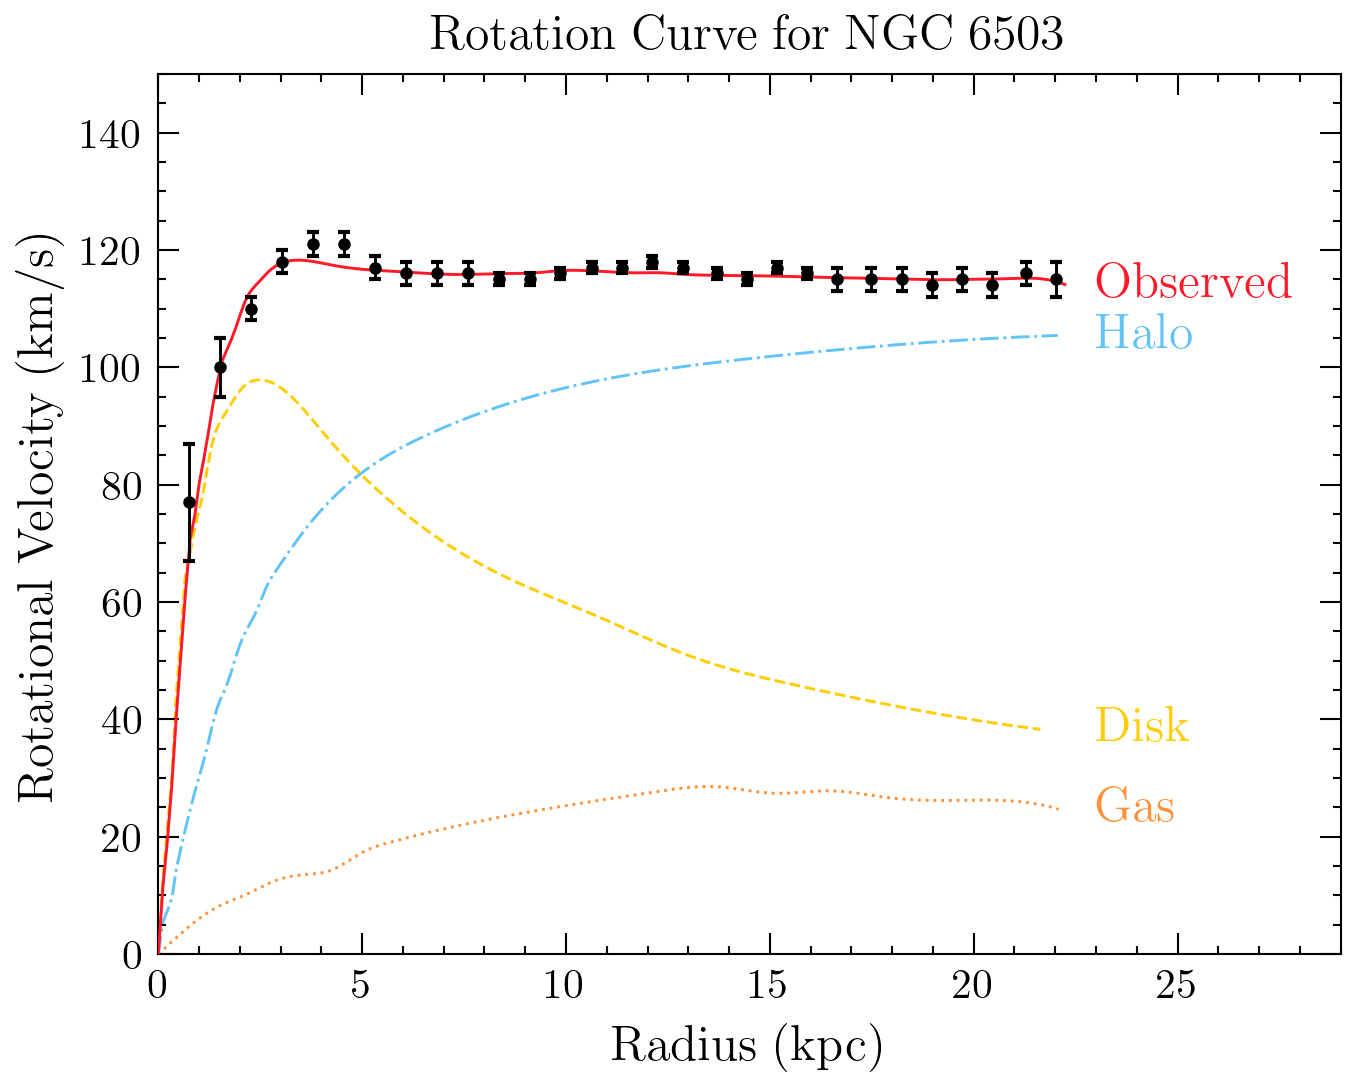

In [5]:

fig, ax = plt.subplots()

x_full = np.linspace(0, full_x[-1], 200)
ax.plot(x_full, full_interp(x_full), zorder = 10)
col = ax.get_lines()[-1].get_color()
ax.text(23, full_interp(x_full[-1]), r'$\mathrm{Observed}$', horizontalalignment = 'left', verticalalignment = 'center', color = col)


x_halo = np.linspace(0, halo_x[-1], 200)
ax.plot(x_halo, halo_interp(x_halo), ls = '-.', zorder = -1)
col = ax.get_lines()[-1].get_color()
ax.text(23, halo_interp(x_halo[-1]), r'$\mathrm{Halo}$', horizontalalignment = 'left', verticalalignment = 'center', color = col)

x_gas = np.linspace(0, gas_x[-1], 200)
ax.plot(x_gas, gas_interp(x_gas), ls = ':', zorder = -1)
col = ax.get_lines()[-1].get_color()
ax.text(23, gas_interp(x_gas[-1]), r'$\mathrm{Gas}$', horizontalalignment = 'left', verticalalignment = 'center', color = col)

x_disk = np.linspace(0, disk_x[-1], 200)
ax.plot(x_disk, disk_interp(x_disk), ls = '--', zorder = -1)
col = ax.get_lines()[-1].get_color()
ax.text(23, disk_interp(x_disk[-1]), r'$\mathrm{Disk}$', horizontalalignment = 'left', verticalalignment = 'center', color = col)


# ax.scatter(raw_x, raw_y, c='black', zorder = 11)
ax.errorbar(raw_x[:-2], raw_y[:-2], yerr=raw_err_y[:-2], color = 'black',   , marker = 'o', markersize = 2, zorder = 11, linestyle = 'none')

plt.xlabel(r'$\mathrm{Radius\;(kpc)}$')
plt.ylabel(r'$\mathrm{Rotational\;Velocity\;(km/s)}$')
plt.title(r'$\mathrm{Rotation\;Curve\;for\;NGC\;6503}$')

plt.xlim(0, 29)
plt.ylim(0, 150)

plt.savefig("gal_rotn_N6503.pdf")


In [137]:
from scipy.optimize import curve_fit

# Neutron Star Mass Radius


In [2]:
radii_constr, masses_constr = np.loadtxt('NS_mass_rads/max_radius.txt', unpack=True)

rad_19, mass_19 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk19_mr.txt', unpack=True)
rad_22, mass_22 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk22_mr.txt', unpack=True)
rad_24, mass_24 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk24_mr.txt', unpack=True)
rad_25, mass_25 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk25_mr.txt', unpack=True)
rad_26, mass_26 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk26_mr.txt', unpack=True)

rad_Q1, mass_Q1 = np.loadtxt('NS_mass_rads/QMC_MR/QMC_1.txt', unpack=True)
rad_Q2, mass_Q2 = np.loadtxt('NS_mass_rads/QMC_MR/QMC_2.txt', unpack=True)
rad_Q3, mass_Q3 = np.loadtxt('NS_mass_rads/QMC_MR/QMC_3.txt', unpack=True)


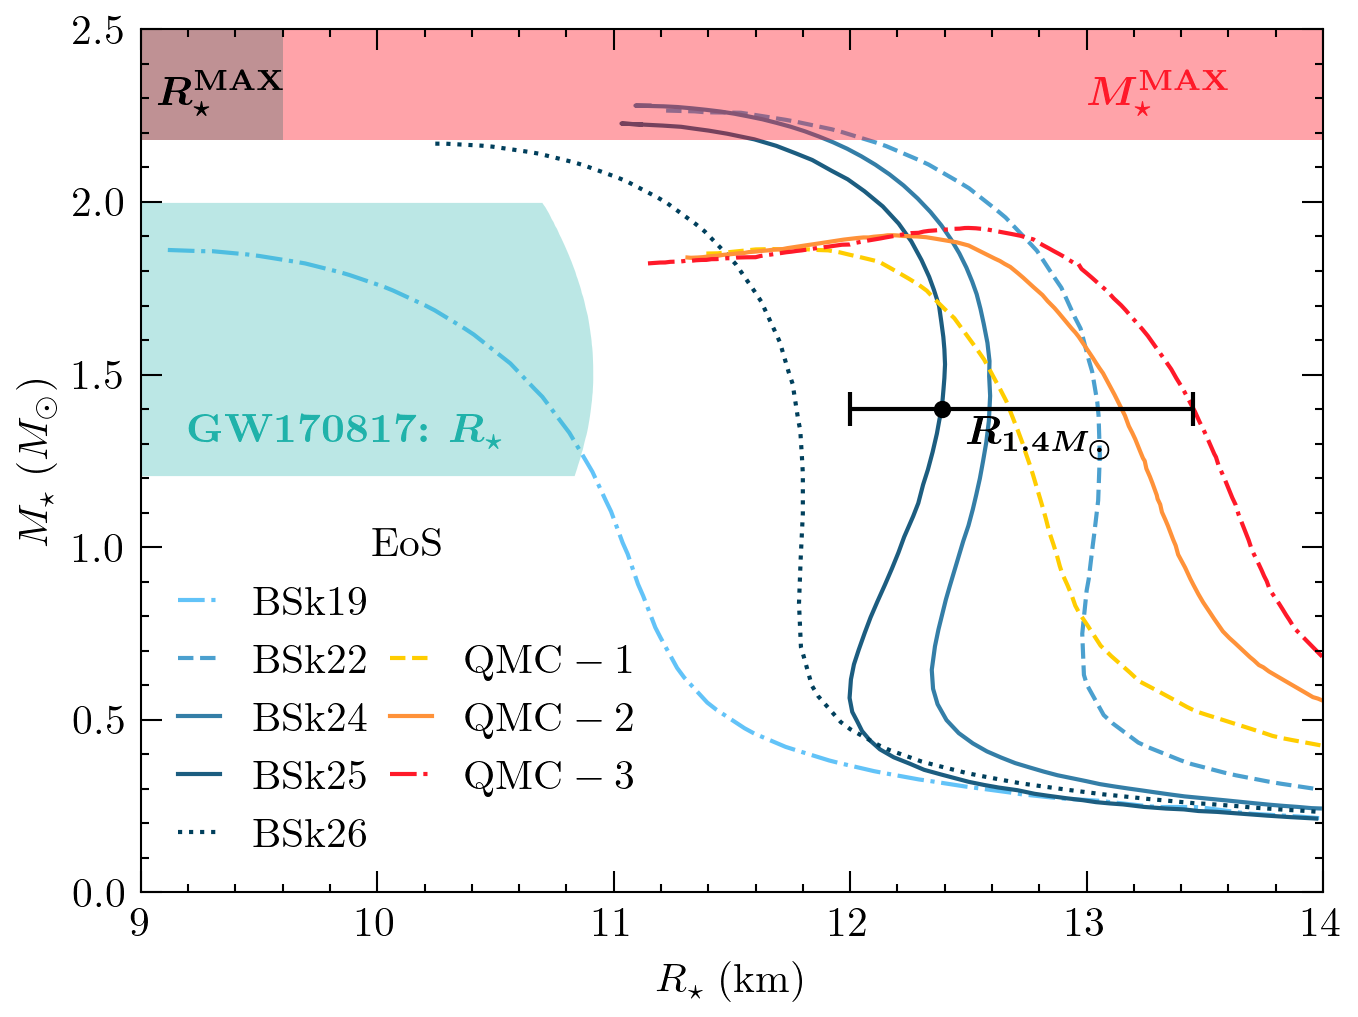

In [43]:
# radii_up = np.linspace()
# plt.plot(radii_constr, masses_constr, c = 'C08', alpha = 0.2)

bsk_cols = ['#003f5c', '#1c5d80', '#347ea7', '#4ba0cf', '#62c3f8']
plt.plot(rad_19, mass_19, ls = '-.', label = r'$\mathrm{BSk19}$', c = bsk_cols[-1], zorder = 1)
plt.plot(rad_22, mass_22, ls = '--', label = r'$\mathrm{BSk22}$', c = bsk_cols[-2], zorder = 1)
plt.plot(rad_24, mass_24, label = r'$\mathrm{BSk24}$', c = bsk_cols[-3], zorder = 1)
plt.plot(rad_25, mass_25, label = r'$\mathrm{BSk25}$', c = bsk_cols[-4], zorder = 1)
plt.plot(rad_26, mass_26, ls = ':', label = r'$\mathrm{BSk26}$', c = bsk_cols[-5], zorder = 1)


plt.plot(np.NaN, np.NaN, '-', color='none', label=' ')
plt.plot(rad_Q1, mass_Q1, ls = '--', label = r'$\mathrm{QMC-1}$', c = 'C03', zorder = 1)
plt.plot(rad_Q2, mass_Q2, label = r'$\mathrm{QMC-2}$', c = 'C02', zorder = 1)
plt.plot(rad_Q3, mass_Q3, ls = '-.', label = r'$\mathrm{QMC-3}$', c = 'C00', zorder = 1)
plt.plot(np.NaN, np.NaN, '-', color='none', label=' ')

R14 = 12.39
r_err = [[R14-12], [13.45 - R14]]
plt.scatter([R14], [1.4], s = 10, c ='black', zorder = 10)
plt.errorbar(R14, 1.4, xerr=r_err, c = 'black', capsize=4)

plt.fill_betweenx(masses_constr, 0, radii_constr, color = 'C08', alpha = 0.3, ec = 'none')
plt.fill_between((0, 14), 2.18, 2.5, alpha = 0.4, fc = 'C00')
plt.fill_between((0, 9.6), 2.18, 2.5, fc = 'grey', alpha = 0.5)

# plt.fill_between(np.linspace(9, radii_constr.min(), 20), masses_constr.min(), masses_constr.max(), color = 'C08')
plt.xlim(9, 14)
plt.ylim(0, 2.5)

plt.xlabel(r'$R_\star\;\mathrm{(km)}$')
plt.ylabel(r'$M_\star\;{(M_\odot)}$')

plt.text(9.2, 1.3, r'\textbf{GW170817:} $\bm{R_\star}$', horizontalalignment = 'left', c = 'C08')
plt.text(13, 2.25, r'$\bm{M^{\mathrm{MAX}}_\star}$', horizontalalignment = 'left', verticalalignment = 'bottom', c = 'C00')
plt.text(9.07, 2.25, r'$\bm{R^{\mathrm{MAX}}_\star}$', horizontalalignment = 'left', verticalalignment = 'bottom')
plt.text(12.8, 1.38, r'$\bm{R_{1.4M_\odot}}$', horizontalalignment = 'center', verticalalignment = 'top')

plt.legend(title = r'EoS', ncol = 2)
plt.savefig('NS_mass_radius.pdf')

In [ ]:
d